<img src="hw1.PNG">

<img src="problem1.PNG">

In [3]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random

def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

def parseData(fname):
  for l in open(fname):
    yield eval(l)

print("Reading data...")

Reading data...


In [4]:
# Download from https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/fantasy_10000.json.gz"
data = list(parseData("./data/fantasy_10000.json"))
print(type(data)) # <class 'list'>
print(type(data[0])) # <class 'dictionary'>
print("done")

keys = data[0].keys()
print(keys) 
# dict_keys(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'])
print(type(keys)) # class 'dict_keys'

print(type(data[0]['rating'])) # <class 'int'>
print(type(data[0]['review_text'])) # <class 'str'>
print(data[0]['review_text'])

<class 'list'>
<class 'dict'>
done
dict_keys(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'])
<class 'dict_keys'>
<class 'int'>
<class 'str'>
This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. 
 It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I've read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. 
 It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. Though when it got to folding protons into 8 dimensions I think he w

[286, 778, 2113, 3265, 3558]


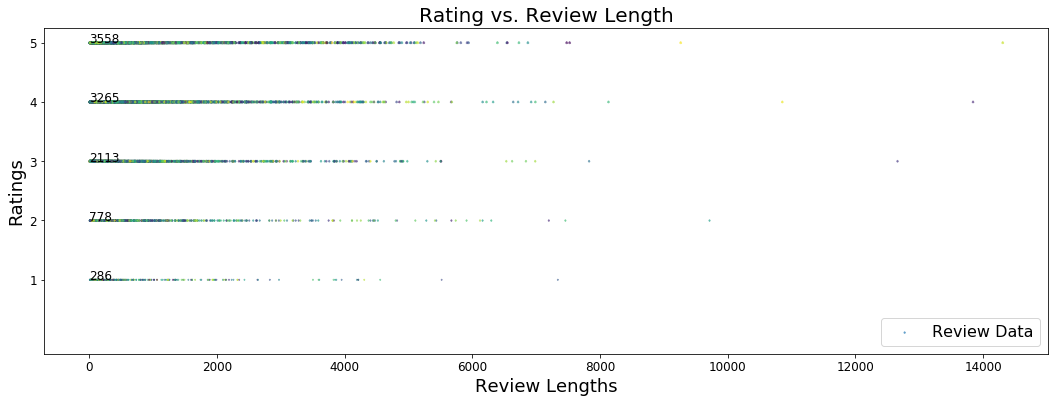

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Build lists and scatter plot
rating_list = [d['rating'] for d in data]
review_length_list = [len(d['review_text']) for d in data]

# number of each rating
rating_count = [0]*5
for r in rating_list:
    rating_count[r-1]+=1
print(rating_count)

# Fixing random state for reproducibility
np.random.seed(19680801)
x = review_length_list
y = rating_list
s = np.random.rand(len(x)) * 8 + 5
colors = np.random.rand(len(x))
plt.figure(figsize=(18,6))
plt.scatter(x, y, rating_list, c=colors, alpha=0.5, marker=r'$\clubsuit$',
            label="Review Data")
'''
plt.plot(numpy.array(x), y, color = 'k', linestyle = '--',\
         label = r"$3.68568136 + 6.87371675 \times 10^{-5} \mathit{length}$")
'''
plt.title("Rating vs. Review Length", fontsize=20)
plt.xlabel("Review Lengths", fontsize=18)
plt.ylabel("Ratings", fontsize=18)
plt.xticks(fontsize= 12)
plt.yticks([1,2,3,4,5],fontsize= 12)
plt.legend(loc='lower right', fontsize=16)
for i in range(5):
    plt.text(0, i+1, rating_count[i], fontsize=12)
plt.savefig('scatter_plot')
plt.show()

Answer for Problem 1 

a. number of 1 star rating : 326
   number of 2 star rating : 286
   number of 3 star rating : 778
   number of 4 star rating : 2113
   number of 5 star rating : 3265
   number of 6 star rating : 3232

b. Scatter plot of Ratings versus Review Lengths :
<img src="scatter_plot.PNG">

<img src="problem2.PNG">

In [38]:
import sklearn.linear_model
import numpy

X = numpy.matrix([[1,l] for l in review_length_list]) # Note the inclusion of the constant term
y = numpy.matrix(rating_list).T
# sklearn model
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)
theta = model.coef_
y_pred = model.predict(X)
mse = (np.square(y - y_pred)).mean(axis=0)
print('Sklearn Model : ')
print('theta = ', theta)
print('mse = ', mse)
print()

# numpy linalg
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)
mse = residuals/len(X)
print('Numpy Linalg : ')
print('theta = ', theta)
print('mse = ', mse)
print()

# pseudoinverse 
print('Pseudoinverse : ')
theta = numpy.linalg.inv(X.T*X)*X.T*y
y_pred = X*theta
mse = (np.square(y - y_pred)).mean(axis=0)
print('theta = ', theta)
print('mse = ', mse)

Sklearn Model : 
theta =  [[3.68568136e+00 6.87371675e-05]]
mse =  [[1.55220866]]

Numpy Linalg : 
theta =  [[3.68568136e+00]
 [6.87371675e-05]]
mse =  [[1.55220866]]

Pseudoinverse : 
theta =  [[3.68568136e+00]
 [6.87371675e-05]]
mse =  [[1.55220866]]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Answer for Problem 2

a. $$ \theta_0=3.68568136e+00,   
      \theta_1=6.87371675e-05 $$

b. $$ MSE = 1.55220866 $$

<img src="problem3.PNG">

In [68]:
import dateutil.parser

print(data[0])
# first two examples
t = dateutil.parser.parse(data[0]['date_added'])
print(t.weekday(), t.year, t.month, t.day)
t = dateutil.parser.parse(data[0]['date_added'])
print(t.weekday(), t.year, t.month, t.day)

# year to one hot
year_list = [dateutil.parser.parse(d['date_added']).year for d in data]
# print(year_list)
print(min(year_list)) # 2006
print(max(year_list)) # 2017

# one hot for year : [bool_2006, ..., bool_2017]  (length = 12)
def year_feat(y):
    year_feat = [0]*12
    year_feat[y-2006] = 1
    return year_feat
year_feature_list = [year_feat(y) for y in year_list]
year_feature_list[0:2]

{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': '18245960', 'review_id': 'dfdbb7b0eb5a7e4c26d59a937e2e5feb', 'rating': 5, 'review_text': 'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happ

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [90]:
# weeklday to one hot
weekday_list = [dateutil.parser.parse(d['date_added']).weekday() for d in data]
# one hot for weekday : [bool_mon, bool_tue, bool_wed, bool_thur, bool_fri, bool_sat, bool_sun] (length = 7)
def weekday_feat(wd):
    weekday_feat = [0]*6
    if wd==0:
        return weekday_feat
    weekday_feat[wd-1] = 1
    return weekday_feat
year_list = [dateutil.parser.parse(d['date_added']).weekday() for d in data]
weakday_feature_list = [weekday_feat(wd) for wd in weekday_list]
weakday_feature_list[0:2]

[[0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0]]

In [92]:
print(type(X))
year_feature_mat = np.matrix(year_feature_list)
weakday_feature_mat = np.matrix(weakday_feature_list)
feature_mat = np.concatenate((X,weakday_feature_mat,year_feature_mat), axis=1)
print(feature_mat[0])
print(feature_mat[1])
print(feature_mat.shape)

<class 'numpy.matrix'>
[[   1 2086    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    1]]
[[   1 1521    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0]]
(10000, 20)


Answer for Problem 3

a. feature vector of the first example : 
    [   1 2086    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    1]
     
   feature vector of the second example
    [   1 1521    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0]

<img src="problem4.PNG">

In [102]:
# values directly as features
weekday_mat = np.transpose(np.matrix(weekday_list))
year_mat = np.transpose(np.matrix(year_list))
direct_mat = np.concatenate((X,weekday_mat,year_mat), axis=1)
model_direct = sklearn.linear_model.LinearRegression(fit_intercept=False)
model_direct.fit(direct_mat, y)
theta = model_direct.coef_
y_pred = model_direct.predict(direct_mat)
mse = (np.square(y - y_pred)).mean(axis=0)
print('Values Directly as Features : ')
print('theta = ', theta)
print('mse = ', mse)
print()

Values Directly as Features : 
theta =  [3.65840612e+00 6.89145177e-05 4.78433417e-03 4.78433417e-03]
mse =  1.551855986457428



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [103]:
# one-hot encoding
model_onehot = sklearn.linear_model.LinearRegression(fit_intercept=False)
model_onehot.fit(feature_mat, y)
theta = model_onehot.coef_
y_pred = model_onehot.predict(feature_mat)
mse = (np.square(y - y_pred)).mean(axis=0)
print('One-hot Encoding : ')
print('theta = ', theta)
print('mse = ', mse)
print()

One-hot Encoding : 
theta =  [ 3.31672665e+00  5.15709386e-05  4.89003441e-02  1.45709798e-01
  1.06646403e-01  1.26168316e-01  3.83417660e-02  1.02846903e-01
  1.55498815e+00 -2.74596845e-02 -1.49486021e-01 -1.28172419e-01
 -1.15250901e-01 -7.37818670e-02  3.55421097e-01  4.50539982e-01
  4.63364533e-01  3.46374608e-01  3.18513277e-01  3.21675895e-01]
mse =  1.5123578656428203



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Answer for Problem 4

a. Values Directly as Features : $$ MSE = 1.551855986457428 $$
   
b. One-hot Encoding : $$ MSE = 1.5123578656428203 $$
   

<img src="problem5.PNG">

In [113]:
# values directly as features

# split data
indices = numpy.random.permutation(direct_mat.shape[0])
train_idx, test_idx = indices[:5000], indices[5000:]
direct_train_mat = direct_mat[train_idx,:]
direct_test_mat = direct_mat[test_idx,:]
y_train = [y[i] for i in train_idx]
y_test = [y[i] for i in test_idx]

# fit model 
model_direct = sklearn.linear_model.LinearRegression(fit_intercept=False)
model_direct.fit(direct_train_mat, y_train)
theta = model_direct.coef_
print('Values Directly as Features : ')
print('theta = ', theta)

# on training set
y_train_pred = model_direct.predict(direct_train_mat)
mse = (np.square(y_train - y_train_pred)).mean(axis=0)
print('mse on train = ', mse)

# on testing set
y_test_pred = model_direct.predict(direct_test_mat)
mse = (np.square(y_test - y_test_pred)).mean(axis=0)
print('mse on test = ', mse)

Values Directly as Features : 
theta =  [3.63181518e+00 8.19611176e-05 6.09145825e-03 6.09145825e-03]
mse on train =  1.559067386789953
mse on test =  1.545207362345102


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [115]:
# one-hot encoding

# split data
indices = numpy.random.permutation(feature_mat.shape[0])
train_idx, test_idx = indices[:5000], indices[5000:]
feature_train_mat = feature_mat[train_idx,:]
feature_test_mat = feature_mat[test_idx,:]
y_train = [y[i] for i in train_idx]
y_test = [y[i] for i in test_idx]


# fit model 
model_onehot = sklearn.linear_model.LinearRegression(fit_intercept=False)
model_onehot.fit(feature_train_mat, y_train)
theta = model_onehot.coef_
print('One-hot Encoding : ')
print('theta = ', theta)

# on training set
y_train_pred = model_onehot.predict(feature_train_mat)
mse = (np.square(y_train - y_train_pred)).mean(axis=0)
print('mse on train = ', mse)

# on testing set
y_test_pred = model_onehot.predict(feature_test_mat)
mse = (np.square(y_test - y_test_pred)).mean(axis=0)
print('mse on test = ', mse)



One-hot Encoding : 
theta =  [ 3.30312045e+00  6.19598536e-05 -3.24712671e-02  1.57070718e-01
  5.58132296e-02  1.14749058e-01 -1.03799941e-02  4.88245683e-02
  1.72005683e+00 -6.39487424e-01 -6.97955479e-02 -6.00196726e-02
 -1.21857521e-01 -1.40380556e-01  3.97417934e-01  4.78515860e-01
  5.28343005e-01  4.67751022e-01  3.52970940e-01  3.89605581e-01]
mse on train =  1.5119933705261204
mse on test =  1.5204507089400787


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Answer for Problem 5

a. Values Directly as Features : $$ MSE_{train} =  1.559067386789953, 
MSE_{test} =  1.545207362345102 $$
   
b. One-hot Encoding : $$ MSE_{train} =  1.5119933705261204,
MSE_{test} =  1.5204507089400787 $$
   

<img src="problem6.PNG">

Answer for Problem 6
a.  $$ MAE = \frac{\sum_{i=1}^{n} \lvert y_{pred} - y_n \lvert}{n} $$
$$ \frac{d \lvert y_{pred} - y_n \lvert}{d y_{pred}} = \begin{cases} +1 & y_{pred}>y_n \\ -1 & y_{pred}<y_n \end{cases} $$
Hence $$ \frac{d MAE}{d y_{pred}} =  \frac{d \lvert y_{pred} - y_n \lvert}{d y_{pred}}*\frac{1}{n} $$ 
Equals to zero only when there are identical numbers of +1 and -1 in the equation. That is, when y_pred equals to the median of the label y.

<img src="task2.PNG">
<img src="problem7.PNG">

In [8]:
from urllib.request import urlopen

def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

print("Reading data...")
# Download from http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json
data = list(parseDataFromURL("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))
print("done")
print(data[0])

Reading data...
done
{'review/appearance': 2.5, 'beer/style': 'Hefeweizen', 'review/palate': 1.5, 'review/taste': 1.5, 'beer/name': 'Sausa Weizen', 'review/timeUnix': 1234817823, 'beer/ABV': 5.0, 'beer/beerId': '47986', 'beer/brewerId': '10325', 'review/timeStruct': {'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57, 'sec': 3, 'mon': 2, 'year': 2009, 'yday': 47, 'wday': 0}, 'review/overall': 1.5, 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.', 'user/profileName': 'stcules', 'review/aroma': 2.0}


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit

X = [[1,len(d['review/text'])] for d in data]
y = [d['review/overall'] >= 4 for d in data]

'''
# plot the distribution
pos_class = [d['review/text'] for d in data if d['review/overall']>=4]
neg_class = [d['review/text'] for d in data if d['review/overall']<4]
plt.figure(figsize=(18,6))
plt.hist(pos_class, bins=1000, color='tab:blue')
plt.hist(neg_class, bins=1000, color='tab:orange')
plt.ylabel('Count')
plt.xlabel('Review Length')
plt.title('Positive/ Negative Rate versus Review Length distribution')
plt.show()
'''

"\n# plot the distribution\npos_class = [d['review/text'] for d in data if d['review/overall']>=4]\nneg_class = [d['review/text'] for d in data if d['review/overall']<4]\nplt.figure(figsize=(18,6))\nplt.hist(pos_class, bins=1000, color='tab:blue')\nplt.hist(neg_class, bins=1000, color='tab:orange')\nplt.ylabel('Count')\nplt.xlabel('Review Length')\nplt.title('Positive/ Negative Rate versus Review Length distribution')\nplt.show()\n"

In [138]:
# Logistic regression classifier
clf = linear_model.LogisticRegression(class_weight='balanced')
clf.fit(X, y)
print(clf.coef_)
print(clf.classes_)
pred = clf.predict(X)
theta = np.matrix(clf.coef_)
#clf.score(X,y)
#pred_recover = [bool(p>0) for p in np.matrix(X)*np.matrix(model.coef_).T]
#print(pred_recover)
#print(sum(pred_recover==pred))

[[-0.12545388  0.00035402]]
[False  True]


In [140]:
# True positives, false positives, etc.
TP_ = numpy.logical_and(pred, y)
FP_ = numpy.logical_and(pred, numpy.logical_not(y))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(y))
FN_ = numpy.logical_and(numpy.logical_not(pred), y)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)
print('FN = ', FN)
# accuracy sum(correct) / len(correct)
accuracy = (TP + TN) / (TP + FP + TN + FN)
print('ACC = ', accuracy)
# BER
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print('BER = ', BER)

TP =  14201
FP =  5885
TN =  10503
FN =  19411
ACC =  0.49408
BER =  0.4683031525957275


Answer for Problem 7

a. $$ TP = 14201, FP = 5885, TN = 10503, FN = 19411 $$
   $$ BER = 0.4683 $$

<img src="problem8.PNG">

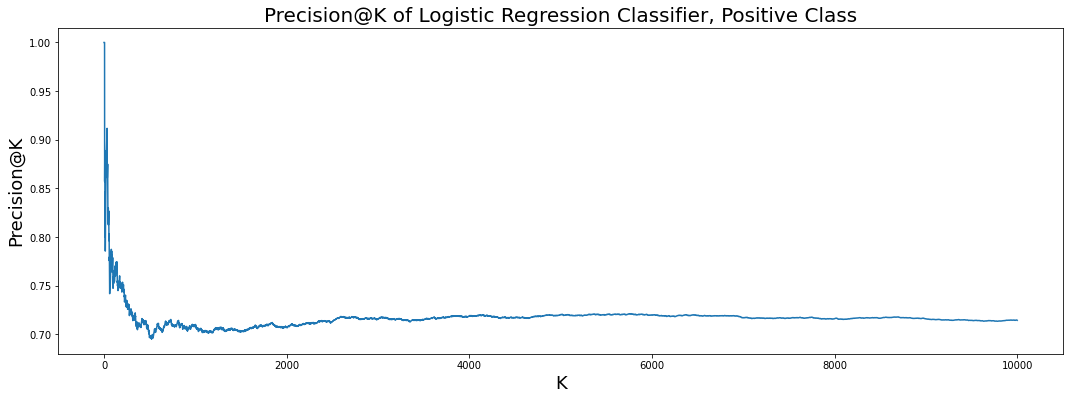

In [163]:
prob_pos = clf.predict_proba(X)[:,1]
#print(prob_pos)
sorted_index = numpy.argsort(prob_pos)
sorted_index = list(sorted_index)
#print(sorted_index)
sorted_index.reverse()
#print(sorted_index)
precision_at_k = [0]*10000
pred_sorted = pred[sorted_index]
y_sorted = [y[i] for i in sorted_index]
count = 0
for k in range(10000): 
    count+=(y_sorted[k]==True)
    precision_at_k[k] = count/(k+1)
    #print(precision_at_k[k]
    
plt.figure(figsize=(18,6))
plt.xlabel('K',fontsize =18)
plt.ylabel('Precision@K',fontsize =18)
plt.title('Precision@K of Logistic Regression Classifier, Positive Class',fontsize =20)
plt.plot([k+1 for k in range(10000)], precision_at_k, color='tab:blue')
plt.show()

Answer for Problem 8

a. Precision@K for K={1...10000}, Positive Class 
<img src="precision@K_pos.PNG">

<img src="problem9.PNG">

Precision@ 1 = 1.0
Precision@ 100 = 0.75
Precision@ 10000 = 0.6195


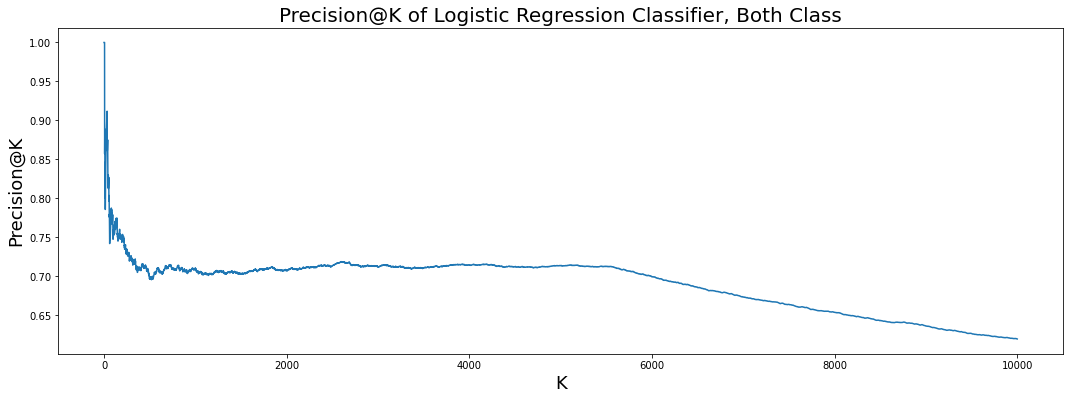

In [164]:
# conf score for both class
conf_score = numpy.amax(clf.predict_proba(X),1)
sorted_index = numpy.argsort(conf_score)
sorted_index = list(sorted_index)
#print(sorted_index)
sorted_index.reverse()
#print(sorted_index)
precision_at_k = [0]*10000
pred_sorted = pred[sorted_index]
y_sorted = [y[i] for i in sorted_index]
count = 0
for k in range(10000): 
    count+=(pred_sorted[k]==y_sorted[k])
    precision_at_k[k] = count/(k+1)
    
for k in [1,100,10000]:
    print('Precision@ %d ='%k,precision_at_k[k-1])
          
plt.figure(figsize=(18,6))
plt.xlabel('K',fontsize =18)
plt.ylabel('Precision@K',fontsize =18)
plt.title('Precision@K of Logistic Regression Classifier, Both Class',fontsize =20)
plt.plot([k+1 for k in range(10000)], precision_at_k, color='tab:blue')
plt.show()

Answer for Problem 9

a. $$Precision@ 1 = 1.0$$
$$Precision@ 100 = 0.75$$
$$Precision@ 10000 = 0.6195$$

b. Precision@K for K={1...10000}, Both Class 
<img src="precision@K_both.PNG">